In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/drive')
data_ = pd.read_csv("/drive/MyDrive/ENG1111 sla/data.csv")
data = pd.DataFrame(data_)

display(data[0:])

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(["Unnamed: 32","id"], axis=1, inplace = True)

In [ ]:
x = data.drop('diagnosis', axis=1)
y = data.diagnosis

In [ ]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
xtreino,xteste,ytreino,yteste = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
sc = StandardScaler()
xtreino = sc.fit_transform(xtreino)
xteste = sc.transform(xteste)

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=9, kernel_initializer='he_uniform', activation='relu', input_dim=30))
classifier.add(Dense(units=9, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 9)                 279       
                                                                 
 dense_54 (Dense)            (None, 9)                 90        
                                                                 
 dense_55 (Dense)            (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelo = classifier.fit(xtreino, ytreino, batch_size=100, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8015 - accuracy: 0.4171
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7674 - accuracy: 0.4221
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7365 - accuracy: 0.4422
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7094 - accuracy: 0.4724
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.4849
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6631 - accuracy: 0.5075
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.5276
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6218 - accuracy: 0.5704
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6014 - accuracy: 0.5905
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.6231
Epoch 11/100
4/4 [===========

In [ ]:
y_predic = classifier.predict(xteste)

6/6 [==============================] - 0s 4ms/step


In [ ]:
y_predic = (y_predic > 0.5)
print(y_predic)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(yteste, y_predic)
pontuacao = accuracy_score(yteste, y_predic)
print(cm)
print('pontuação: ',pontuacao)

[[113   2]
 [  2  54]]
pontuação:  0.9766081871345029


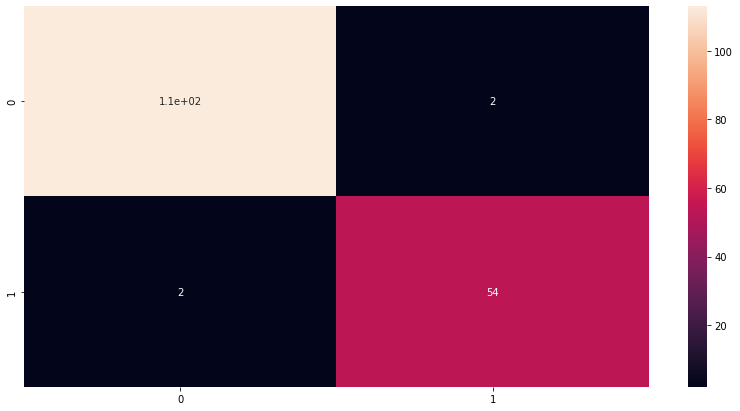

In [ ]:
plt.figure(figsize=[14, 7])
sb.heatmap(cm, annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


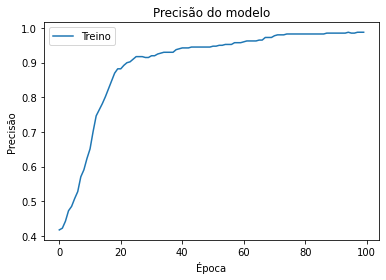

In [ ]:
print(modelo.history.keys())
plt.plot(modelo.history['accuracy'])
plt.title('Precisão do modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

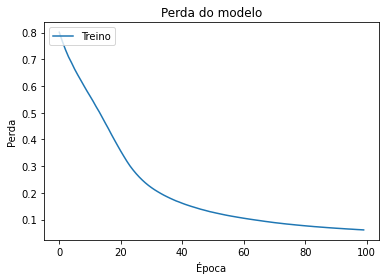

In [ ]:
plt.plot(modelo.history['loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

In [ ]:
classifier.save('/drive/MyDrive/redeneural.h5')